# <font color=red>02. Loan Prediction Dataset ML Implementation In Python (Classification) </font> 

### <font color=blue>Check The Current Version of Libraries</font> 

In [1]:
# Python version
import sys
print('Python: {}'.format(sys.version))
# scipy
import scipy
print('scipy: {}'.format(scipy.__version__))
# numpy
import numpy
print('numpy: {}'.format(numpy.__version__))
# matplotlib
import matplotlib
print('matplotlib: {}'.format(matplotlib.__version__))
# pandas
import pandas
print('pandas: {}'.format(pandas.__version__))
# scikit-learn
import sklearn
print('sklearn: {}'.format(sklearn.__version__))

Python: 3.7.1 (default, Dec 10 2018, 22:54:23) [MSC v.1915 64 bit (AMD64)]
scipy: 1.1.0
numpy: 1.15.4
matplotlib: 3.0.2
pandas: 0.23.4
sklearn: 0.20.1


### <font color=blue>Import libraries</font> 

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

import warnings
warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore", category=DeprecationWarning)

### <font color=blue>Load The Data</font> 

In [3]:
dataset =  pd.read_csv('loan_prediction.csv')

### <font color=blue>Description of The Variables</font> 

### <font color=blue>Explotary Analysis of The Dataset</font> 

In [4]:
# head
print(dataset.head())

    Loan_ID Gender Married Dependents     Education Self_Employed  \
0  LP001002   Male      No          0      Graduate            No   
1  LP001003   Male     Yes          1      Graduate            No   
2  LP001005   Male     Yes          0      Graduate           Yes   
3  LP001006   Male     Yes          0  Not Graduate            No   
4  LP001008   Male      No          0      Graduate            No   

   ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0             5849                0.0         NaN             360.0   
1             4583             1508.0       128.0             360.0   
2             3000                0.0        66.0             360.0   
3             2583             2358.0       120.0             360.0   
4             6000                0.0       141.0             360.0   

   Credit_History Property_Area Loan_Status  
0             1.0         Urban           Y  
1             1.0         Rural           N  
2             1.0   

In [5]:
# tail
print(dataset.tail())

      Loan_ID  Gender Married Dependents Education Self_Employed  \
609  LP002978  Female      No          0  Graduate            No   
610  LP002979    Male     Yes         3+  Graduate            No   
611  LP002983    Male     Yes          1  Graduate            No   
612  LP002984    Male     Yes          2  Graduate            No   
613  LP002990  Female      No          0  Graduate           Yes   

     ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
609             2900                0.0        71.0             360.0   
610             4106                0.0        40.0             180.0   
611             8072              240.0       253.0             360.0   
612             7583                0.0       187.0             360.0   
613             4583                0.0       133.0             360.0   

     Credit_History Property_Area Loan_Status  
609             1.0         Rural           Y  
610             1.0         Rural           Y  
611     

In [6]:
# shape
print(dataset.shape)

(614, 13)


In [7]:
# dataset information
print(dataset.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
Loan_ID              614 non-null object
Gender               601 non-null object
Married              611 non-null object
Dependents           599 non-null object
Education            614 non-null object
Self_Employed        582 non-null object
ApplicantIncome      614 non-null int64
CoapplicantIncome    614 non-null float64
LoanAmount           592 non-null float64
Loan_Amount_Term     600 non-null float64
Credit_History       564 non-null float64
Property_Area        614 non-null object
Loan_Status          614 non-null object
dtypes: float64(4), int64(1), object(8)
memory usage: 62.4+ KB
None


In [8]:
# summary descriptions
print(dataset.describe())

       ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
count       614.000000         614.000000  592.000000         600.00000   
mean       5403.459283        1621.245798  146.412162         342.00000   
std        6109.041673        2926.248369   85.587325          65.12041   
min         150.000000           0.000000    9.000000          12.00000   
25%        2877.500000           0.000000  100.000000         360.00000   
50%        3812.500000        1188.500000  128.000000         360.00000   
75%        5795.000000        2297.250000  168.000000         360.00000   
max       81000.000000       41667.000000  700.000000         480.00000   

       Credit_History  
count      564.000000  
mean         0.842199  
std          0.364878  
min          0.000000  
25%          1.000000  
50%          1.000000  
75%          1.000000  
max          1.000000  


In [9]:
# class distribution
print(dataset.groupby('Loan_Status').size())

Loan_Status
N    192
Y    422
dtype: int64


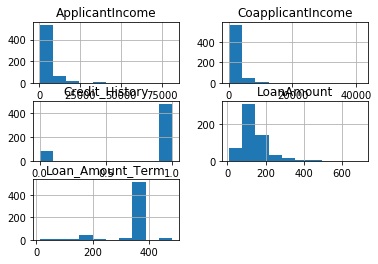

In [10]:
# histograms for distributions of each numeric variable
dataset.hist()
plt.show()

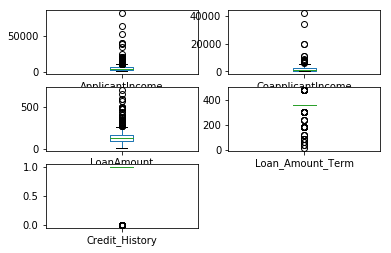

In [11]:
# box and whisker plots for distributions of each variable
dataset.plot(kind='box', subplots=True, layout=(3,2), sharex=False, sharey=False)
plt.show()

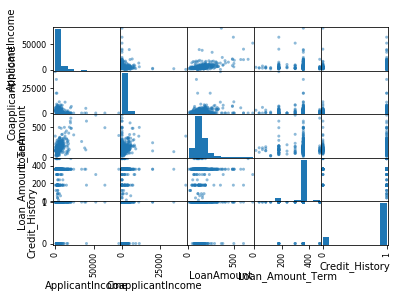

In [12]:
# scatter plot matrix for interactions between the variables.
from pandas.plotting import scatter_matrix
scatter_matrix(dataset)
plt.show()

### <font color=blue>Detailed Distribution analysis</font> 

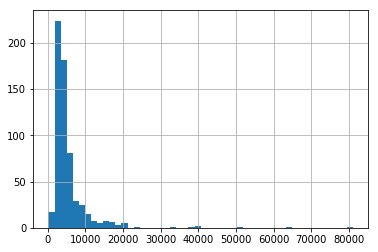

In [13]:
dataset['ApplicantIncome'].hist(bins=50)

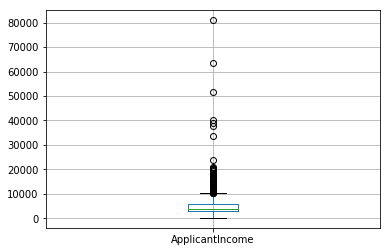

In [14]:
dataset.boxplot(column='ApplicantIncome')

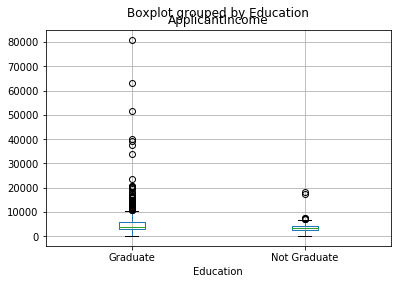

In [15]:
dataset.boxplot(column='ApplicantIncome', by = 'Education')

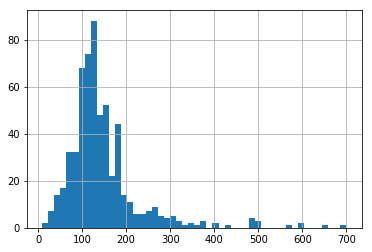

In [16]:
dataset['LoanAmount'].hist(bins=50)

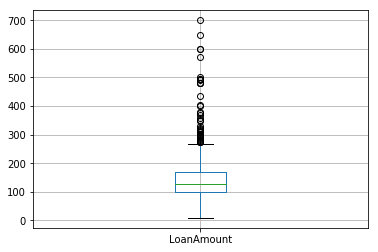

In [17]:
dataset.boxplot(column='LoanAmount')

### <font color=blue>Categorical Variable Analysis</font> 

In [18]:
temp1 = dataset['Credit_History'].value_counts(ascending=True)
temp2 = dataset.pivot_table(values='Loan_Status',index=['Credit_History'],aggfunc=lambda x: x.map({'Y':1,'N':0}).mean())
print ('Frequency Table for Credit History:') 
print (temp1)

print ('\nProbility of getting loan for each Credit History class:')
print (temp2)

Frequency Table for Credit History:
0.0     89
1.0    475
Name: Credit_History, dtype: int64

Probility of getting loan for each Credit History class:
                Loan_Status
Credit_History             
0.0                0.078652
1.0                0.795789


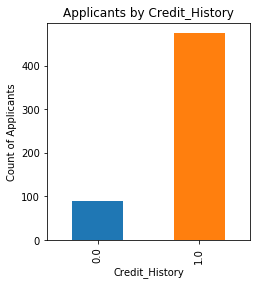

In [19]:
fig = plt.figure(figsize=(8,4))
ax1 = fig.add_subplot(121)
ax1.set_xlabel('Credit_History')
ax1.set_ylabel('Count of Applicants')
ax1.set_title("Applicants by Credit_History")
temp1.plot(kind='bar')
plt.show()

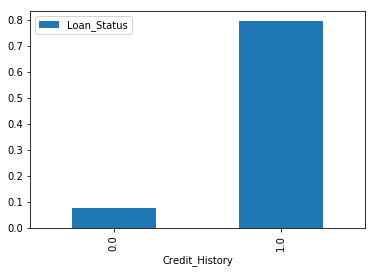

In [20]:
ax2 = fig.add_subplot(122)
temp2.plot(kind = 'bar')
ax2.set_xlabel('Credit_History')
ax2.set_ylabel('Probability of getting loan')
ax2.set_title("Probability of getting loan by credit history")
plt.show()

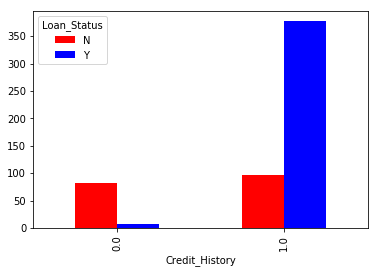

In [21]:
temp3 = pd.crosstab(dataset['Credit_History'], dataset['Loan_Status'])
temp3.plot(kind='bar', stacked=False, color=['red','blue'], grid=False)

### <font color=blue>Data Preprocessing (Missing Values)</font> 

In [22]:
# Check missing values in the dataset
dataset.apply(lambda x: sum(x.isnull()),axis=0) 

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [23]:
 dataset['LoanAmount'].fillna(dataset['LoanAmount'].mean(), inplace=True)

In [24]:
dataset['Self_Employed'].value_counts()

No     500
Yes     82
Name: Self_Employed, dtype: int64

In [25]:
dataset['Self_Employed'].fillna('No',inplace=True)

In [26]:
dataset['Gender'].value_counts()

Male      489
Female    112
Name: Gender, dtype: int64

In [27]:
dataset['Gender'].fillna('Male',inplace=True)

In [28]:
dataset['Married'].value_counts()

Yes    398
No     213
Name: Married, dtype: int64

In [29]:
dataset['Married'].fillna('Yes',inplace=True)

In [30]:
dataset['Dependents'][0:10]

0     0
1     1
2     0
3     0
4     0
5     2
6     0
7    3+
8     2
9     1
Name: Dependents, dtype: object

In [31]:
dataset['Dependents'].value_counts()

0     345
1     102
2     101
3+     51
Name: Dependents, dtype: int64

In [32]:
dataset['Dependents'].fillna(0 ,inplace=True)

In [33]:
dataset['Loan_Amount_Term'].value_counts()

360.0    512
180.0     44
480.0     15
300.0     13
84.0       4
240.0      4
120.0      3
36.0       2
60.0       2
12.0       1
Name: Loan_Amount_Term, dtype: int64

In [34]:
dataset['Loan_Amount_Term'].fillna(360 ,inplace=True)

In [35]:
dataset['Credit_History'].value_counts()

1.0    475
0.0     89
Name: Credit_History, dtype: int64

In [36]:
dataset['Credit_History'].fillna(dataset['Credit_History'].mode()[0], inplace=True)

In [37]:
# Check missing values in the dataset
dataset.apply(lambda x: sum(x.isnull()),axis=0) 

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [38]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
Loan_ID              614 non-null object
Gender               614 non-null object
Married              614 non-null object
Dependents           614 non-null object
Education            614 non-null object
Self_Employed        614 non-null object
ApplicantIncome      614 non-null int64
CoapplicantIncome    614 non-null float64
LoanAmount           614 non-null float64
Loan_Amount_Term     614 non-null float64
Credit_History       614 non-null float64
Property_Area        614 non-null object
Loan_Status          614 non-null object
dtypes: float64(4), int64(1), object(8)
memory usage: 62.4+ KB


In [39]:
dataset.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,614.000000,614.000000,614.000000
mean,5403.459283,1621.245798,146.412162,342.410423,0.855049
std,6109.041673,2926.248369,84.037468,64.428629,0.352339
min,150.000000,0.000000,9.000000,12.000000,0.000000
25%,2877.500000,0.000000,100.250000,360.000000,1.000000
50%,3812.500000,1188.500000,129.000000,360.000000,1.000000
75%,5795.000000,2297.250000,164.750000,360.000000,1.000000
max,81000.000000,41667.000000,700.000000,480.000000,1.000000


### <font color=blue>Data Preprocessing (Dependent/Independent)</font> 

In [40]:
dataset['Dependents'] = dataset['Dependents'].astype(str)

In [41]:
from sklearn.preprocessing import LabelEncoder
var_mod = ['Gender','Married','Education','Dependents', 'Self_Employed','Property_Area','Loan_Status']
le = LabelEncoder()
for i in var_mod:
    dataset[i] = le.fit_transform(dataset[i])
dataset.dtypes 

Loan_ID               object
Gender                 int32
Married                int32
Dependents             int32
Education              int32
Self_Employed          int32
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area          int32
Loan_Status            int32
dtype: object

In [42]:
dataset.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,1,0,0,0,0,5849,0.0,146.412162,360.0,1.0,2,1
1,LP001003,1,1,1,0,0,4583,1508.0,128.000000,360.0,1.0,0,0
2,LP001005,1,1,0,0,1,3000,0.0,66.000000,360.0,1.0,2,1
3,LP001006,1,1,0,1,0,2583,2358.0,120.000000,360.0,1.0,2,1
4,LP001008,1,0,0,0,0,6000,0.0,141.000000,360.0,1.0,2,1


### <font color=blue>Splitting The Dataset</font> 

In [43]:
X = dataset.iloc[:,1:-1].values
y = dataset.iloc[:,12].values

# Splitting the Dataset into the Training Set and Test Set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

### <font color=blue>Building Models</font> 

In [44]:
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

classifiers = []
seed = 0
scoring = 'accuracy'

classifiers.append(('LR', LogisticRegression(solver='liblinear', multi_class='ovr')))
classifiers.append(('KNN', KNeighborsClassifier()))
classifiers.append(('SVM', SVC(gamma='auto')))
classifiers.append(('NB', GaussianNB()))
classifiers.append(('CART', DecisionTreeClassifier()))                  
classifiers.append(('FOREST', RandomForestClassifier()))                   
classifiers.append(('LDA', LinearDiscriminantAnalysis()))

# evaluate each model in turn
results = []
names = []
for name, classifier in classifiers:
	kfold = model_selection.KFold(n_splits=10, random_state=seed)
	cv_results = model_selection.cross_val_score(classifier, X_train, y_train, cv=kfold, scoring=scoring)
	results.append(cv_results)
	names.append(name)
	msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
	print(msg)

LR: 0.804449 (0.060762)
KNN: 0.773878 (0.058217)
SVM: 0.802367 (0.066025)
NB: 0.788163 (0.064082)
CART: 0.668082 (0.064210)
FOREST: 0.778041 (0.079677)
LDA: 0.804449 (0.062118)


### <font color=blue>Comparing Classifiers</font> 

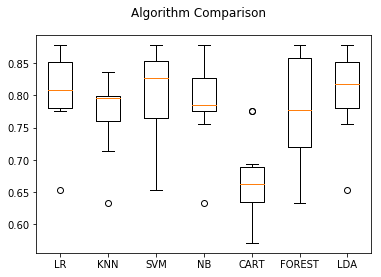

In [45]:
# Compare Classifiers
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

### <font color=blue>Predicting and Evaluating</font> 

In [51]:
# LogisticRegression

# Predicting the Test set results
classifier_LR = LogisticRegression()
classifier_LR.fit(X_train, y_train)
y_pred = classifier_LR.predict(X_test)

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)

ac = accuracy_score(y_test, y_pred)
print(ac)

[[15 18]
 [ 2 88]]
0.8373983739837398


In [52]:
# RandomForestClassifier

# Predicting the Test set results
classifier_RF = RandomForestClassifier(random_state=0)
classifier_RF.fit(X_train, y_train)
y_pred = classifier_RF.predict(X_test)

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

ac = accuracy_score(y_test, y_pred)
print(ac)

[[20 13]
 [17 73]]
0.7560975609756098


In [48]:
#Create a series with feature importances:
feature_importance = pd.Series(classifier_RF.feature_importances_).sort_values(ascending=False)
print (feature_importance)

9     0.267590
5     0.227721
7     0.171547
6     0.126657
10    0.052762
2     0.049415
8     0.031023
3     0.023612
1     0.019432
4     0.015912
0     0.014328
dtype: float64
